In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
from keras.datasets import mnist

In [115]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

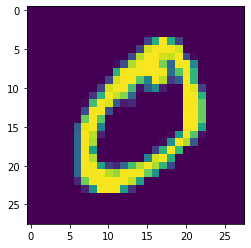

In [116]:
plt.imshow(X_train[1])

In [117]:
print(X_train[1].max(), X_train[1].min())

255 0


In [118]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [119]:
X_train = X_train/255

In [120]:
X_test = X_test/255

In [121]:
from keras.utils import to_categorical

In [122]:
y_cat_train = to_categorical(y_train)

In [123]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [124]:
y_cat_test = to_categorical(y_test)

In [125]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [126]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [127]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping

In [128]:
model = Sequential()

In [129]:
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
early_stop = EarlyStopping(monitor='val_loss', patience=4)

In [133]:
model.fit(X_train, y_cat_train, batch_size=200, epochs=15, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2985 - accuracy: 0.9143 - val_loss: 0.0896 - val_accuracy: 0.9732
Epoch 2/15
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0840 - accuracy: 0.9747 - val_loss: 0.0655 - val_accuracy: 0.9789
Epoch 3/15
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.0501 - val_accuracy: 0.9836
Epoch 4/15
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0441 - val_accuracy: 0.9846
Epoch 5/15
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0420 - val_accuracy: 0.9856
Epoch 6/15
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0431 - val_accuracy: 0.9863
Epoch 7/15
60000/60000 [==============================] - 69s 1ms/st

In [134]:
model_hist = pd.DataFrame(model.history.history)

In [135]:
model_hist.head()

,val_loss,val_accuracy,loss,accuracy
0,0.089607,0.9732,0.298495,0.914350
1,0.065522,0.9789,0.084036,0.974717
2,0.050092,0.9836,0.056484,0.982467
3,0.044078,0.9846,0.043068,0.986633
4,0.042035,0.9856,0.034715,0.989567


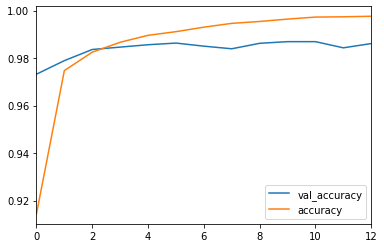

In [136]:
model_hist[['val_accuracy','accuracy']].plot()

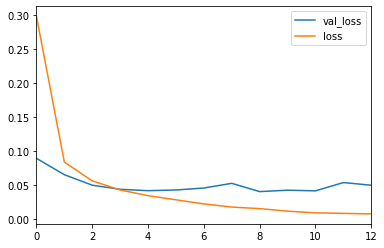

In [137]:
model_hist[['val_loss','loss']].plot()

In [138]:
y_pred = model.predict_classes(X_test)

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [141]:
accuracy_score(y_test, y_pred)

0.9861

In [142]:
confusion_matrix(y_test, y_pred)

array([[ 977,    0,    1,    1,    0,    0,    1,    0,    0,    0],
       [   0, 1125,    3,    2,    0,    0,    2,    1,    2,    0],
       [   0,    1, 1023,    0,    1,    0,    0,    7,    0,    0],
       [   0,    0,    4, 1002,    0,    3,    0,    1,    0,    0],
       [   2,    1,    6,    0,  948,    0,    3,    1,    3,   18],
       [   2,    0,    0,    8,    0,  880,    1,    0,    0,    1],
       [   5,    2,    1,    0,    1,    1,  947,    0,    1,    0],
       [   0,    0,    7,    0,    0,    0,    0, 1015,    2,    4],
       [   5,    0,    7,    2,    0,    2,    1,    1,  951,    5],
       [   0,    1,    0,    4,    3,    2,    0,    5,    1,  993]],
      dtype=int64)

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

